In [ ]:
import os
import itertools
from PIL import Image

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense ,Conv2D , Dropout,Flatten ,MaxPooling2D ,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")


print("modules loaded")

modules loaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
test_path="//content/drive/MyDrive/chest_xray/test/"
image_pathes=[]
labels=[]
files=os.listdir(test_path)
for file in files:
    file_bath=os.path.join(test_path,file)
    images=os.listdir(file_bath)
    for image in images:
        image_bath=os.path.join(file_bath , image)
        image_pathes.append(image_bath)
        labels.append(file)

Fseries =pd.Series(image_pathes,name="image_pathes")
lseries=pd.Series(labels,name="labels")

test_df=pd.concat([Fseries,lseries],axis=1)


In [ ]:
train_path="//content/drive/MyDrive/chest_xray/train/"
image_pathes=[]
labels=[]

files=os.listdir(train_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
train_df=pd.concat([fseries,lseries],axis=1)


In [ ]:
val_path="//content/drive/MyDrive/chest_xray/val/"
image_pathes=[]
labels=[]

files=os.listdir(val_path)
for file in files:
    file_path=os.path.join(train_path,file)
    images=os.listdir(file_path)
    for image in images:
        image_path=os.path.join(file_path,image)
        image_pathes.append(image_path)
        labels.append(file)

fseries=pd.Series(image_pathes, name="image_pathes")
lseries=pd.Series(labels,name="labels")
valid_df=pd.concat([fseries,lseries],axis=1)

In [ ]:
batsh_size=16
image_size=(224,224)

df_gen=ImageDataGenerator()

train_gen=df_gen.flow_from_dataframe(train_df,x_col="image_pathes",y_col="labels",batsh_size=batsh_size,
                           target_size=image_size,class_mode="categorical" ,color_mode="rgb",shuffle=True )
test_gen=df_gen.flow_from_dataframe(test_df,x_col="image_pathes",y_col="labels",target_size=image_size
                                    ,batsh_size=batsh_size ,shuffle=True ,color_mode="rgb",class_mode="categorical")
valid_gen=df_gen.flow_from_dataframe(valid_df,x_col="image_pathes",y_col="labels",target_size=image_size
                                    ,batsh_size=batsh_size , shuffle=True ,color_mode="rgb" ,class_mode="categorical")

Found 5216 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.
Found 5216 validated image filenames belonging to 2 classes.


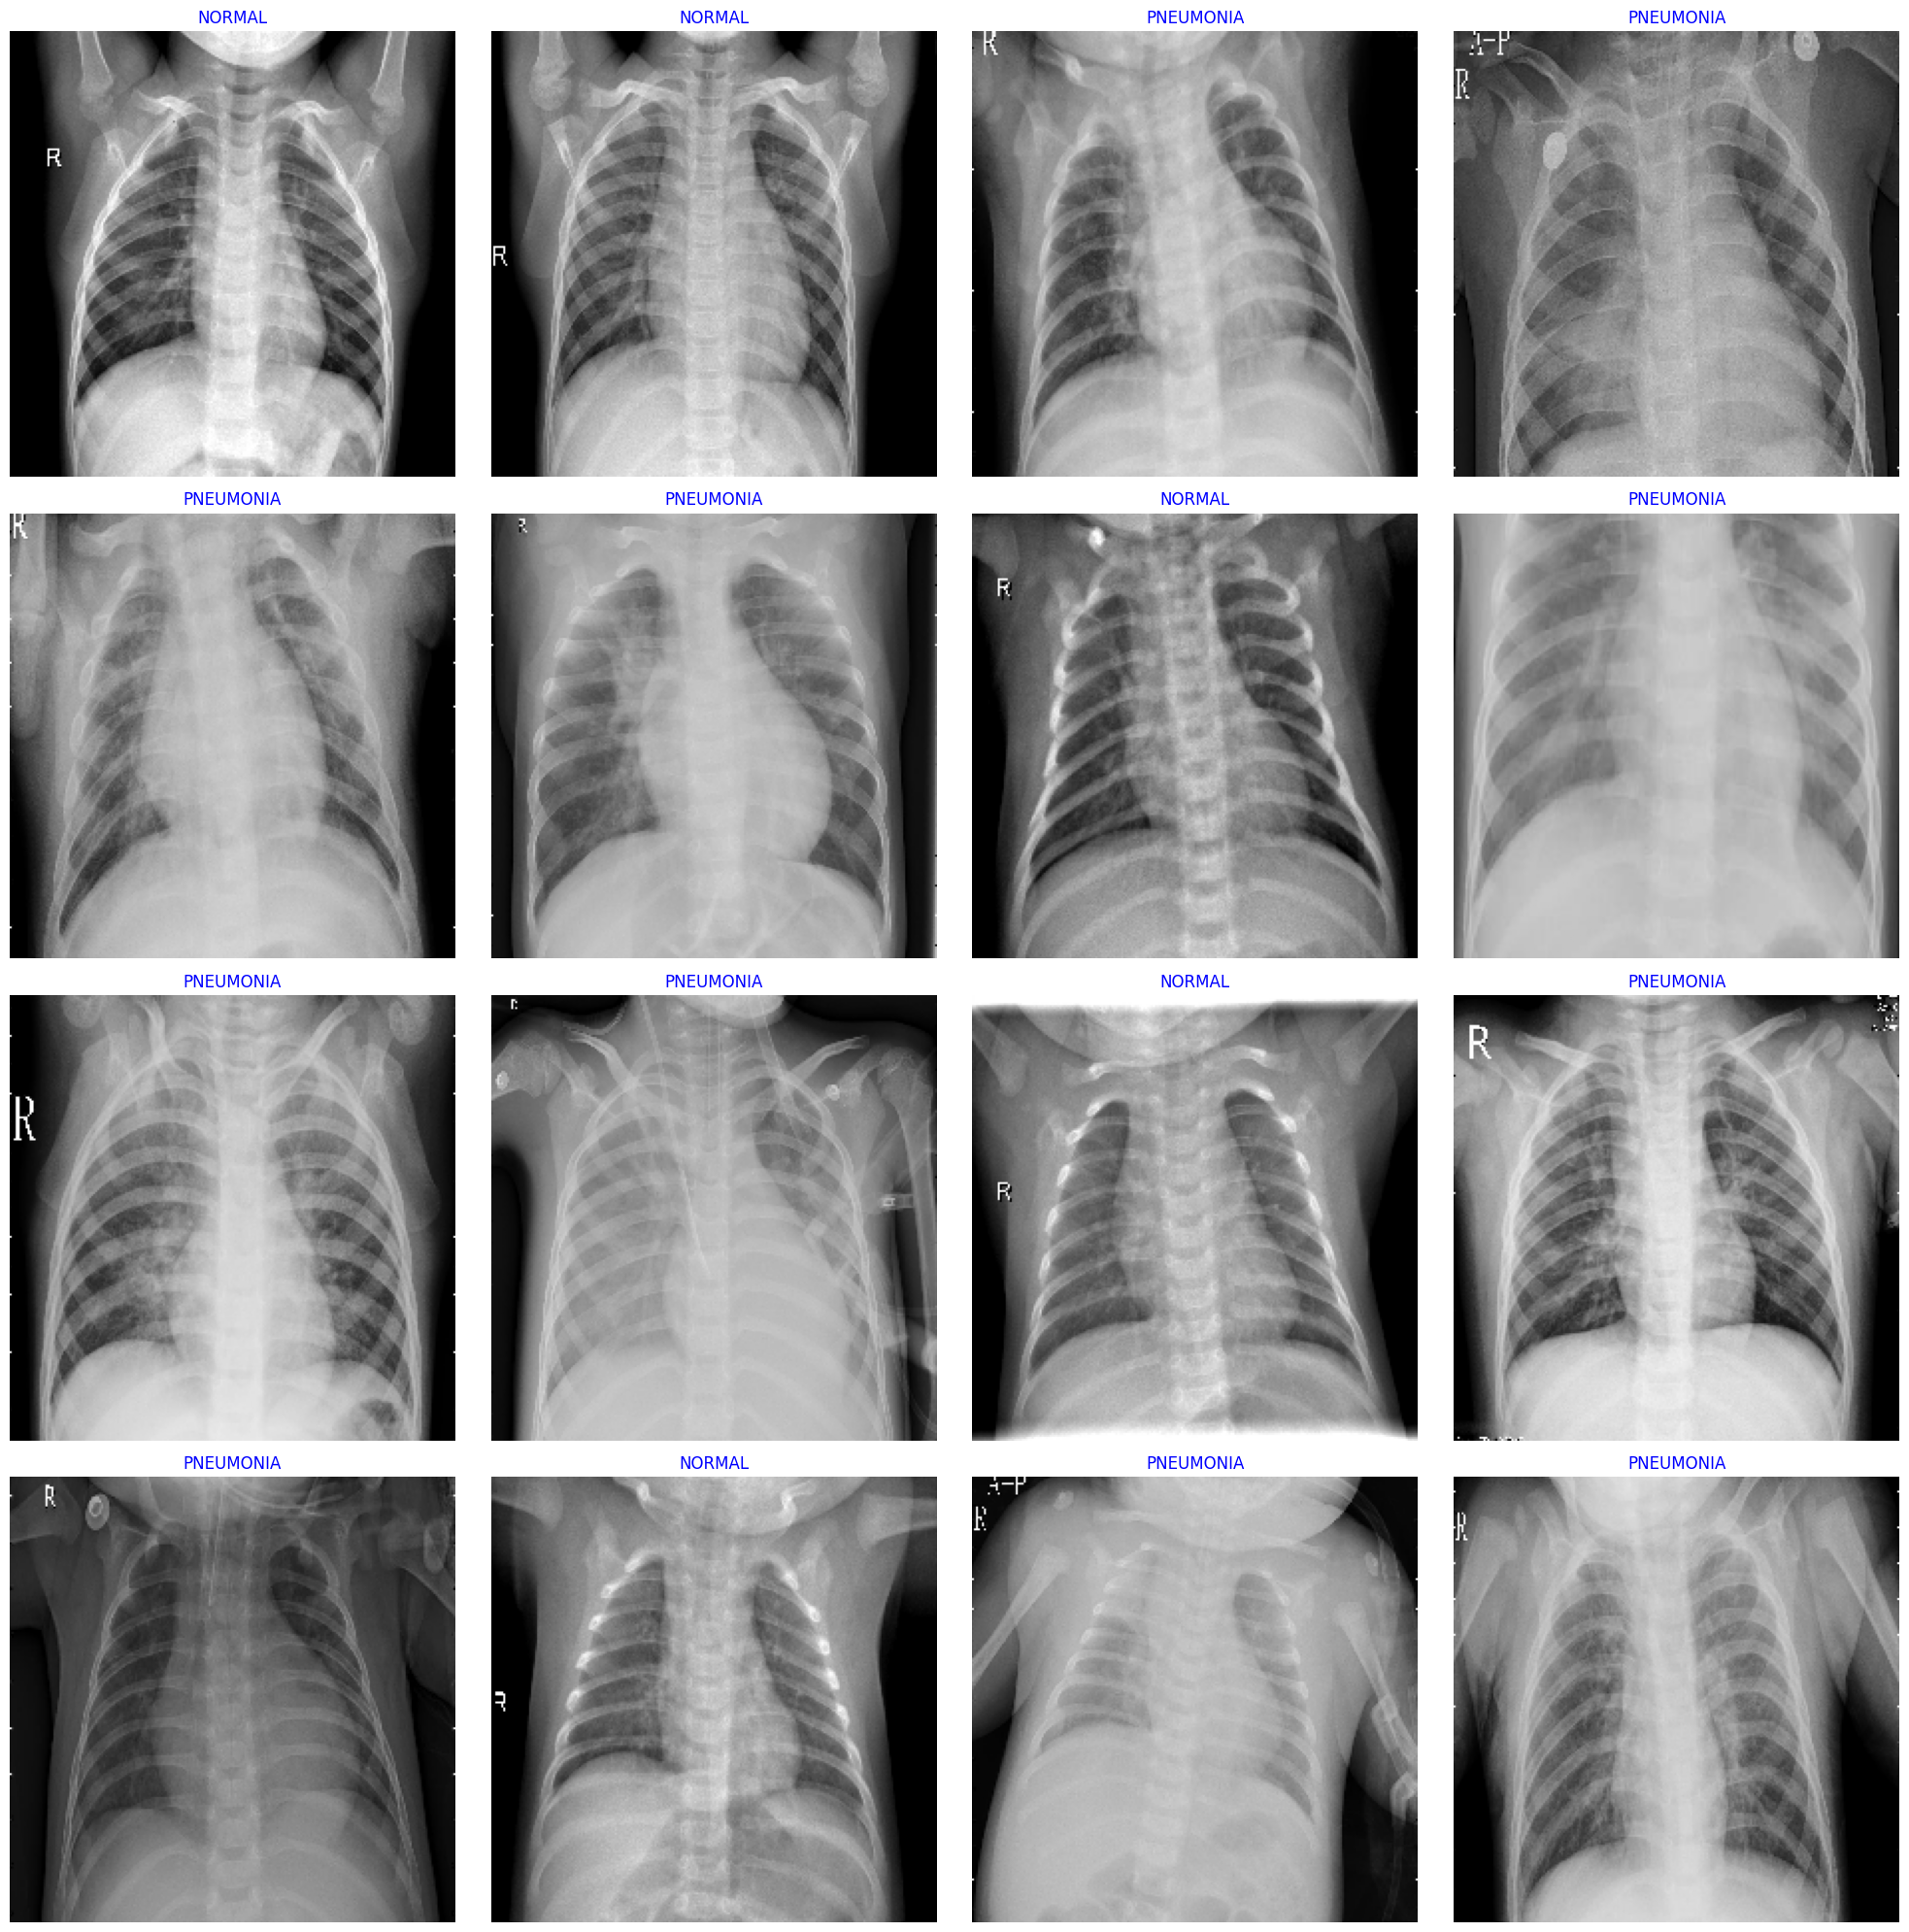

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.2),

    Dense(256,activation = "relu"),
    Dropout(0.2),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(64,activation = "relu"),
    Dropout(0.2),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                        

In [ ]:
epochs=8
history=model.fit(train_gen,epochs=epochs ,validation_data=valid_gen ,verbose=1)

Epoch 1/8
163/163 [==============================] - 14874s 91s/step - loss: 1.0638 - accuracy: 0.8698 - val_loss: 0.6869 - val_accuracy: 0.7554
Epoch 2/8
 24/163 [===>..........................] - ETA: 2:44:00 - loss: 0.2831 - accuracy: 0.9219

KeyboardInterrupt: 

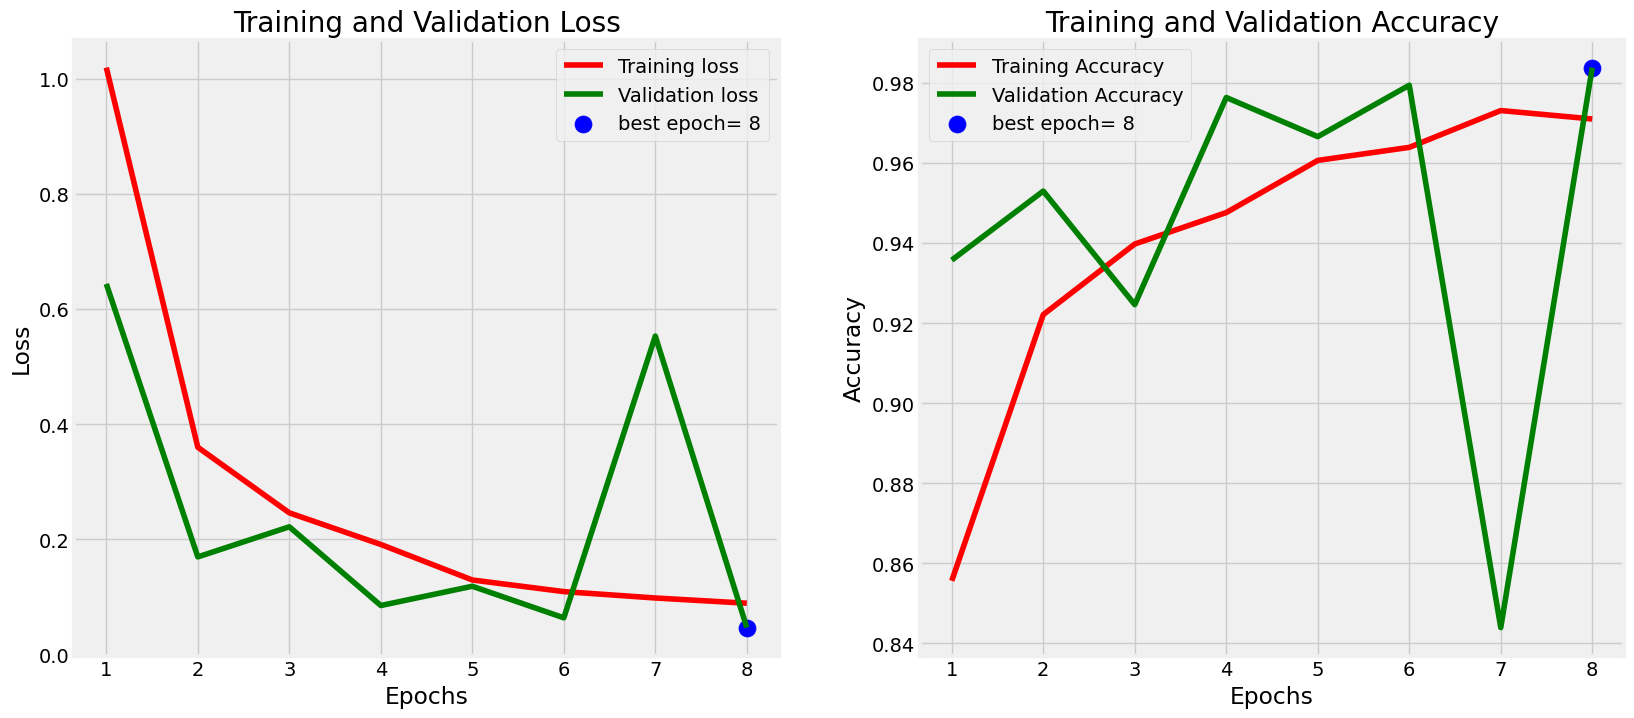

In [ ]:
 tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
train_score=model.evaluate(train_gen , verbose=1)
valid_score=model.evaluate(valid_gen , verbose=1)
test_score=model.evaluate(test_gen , verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("valid Loss: ", valid_score[0])
print("valid Accuracy: ", valid_score[1])
print('-' * 20)
print("test Loss: ", test_score[0])
print("test Accuracy: ", test_score[1])
print('-' * 20)

163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 272ms/step - accuracy: 0.9857 - loss: 0.0453
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 275ms/step - accuracy: 0.9845 - loss: 0.0472
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.7714 - loss: 2.5722

2024-04-29 19:03:16.680139: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-04-29 19:03:16.680205: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-04-29 19:03:16.680214: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-04-29 19:03:16.680221: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-04-29 19:03:16.680229: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.76539, expected 3.24388
2024-04-29 19:03:16.680237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 4.19841, expected 3.6769
2024-04-29 19:03:16.680245: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.88366, expected 3.36216
2024-04-29 19:03:16.680253: E external/local_xla/xla

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 869ms/step - accuracy: 0.7702 - loss: 2.6239
Train Loss:  0.04697546735405922
Train Accuracy:  0.9838957190513611
--------------------
valid Loss:  0.04697547107934952
valid Accuracy:  0.9838957190513611
--------------------
test Loss:  3.1153407096862793
test Accuracy:  0.7596153616905212
--------------------


In [ ]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step


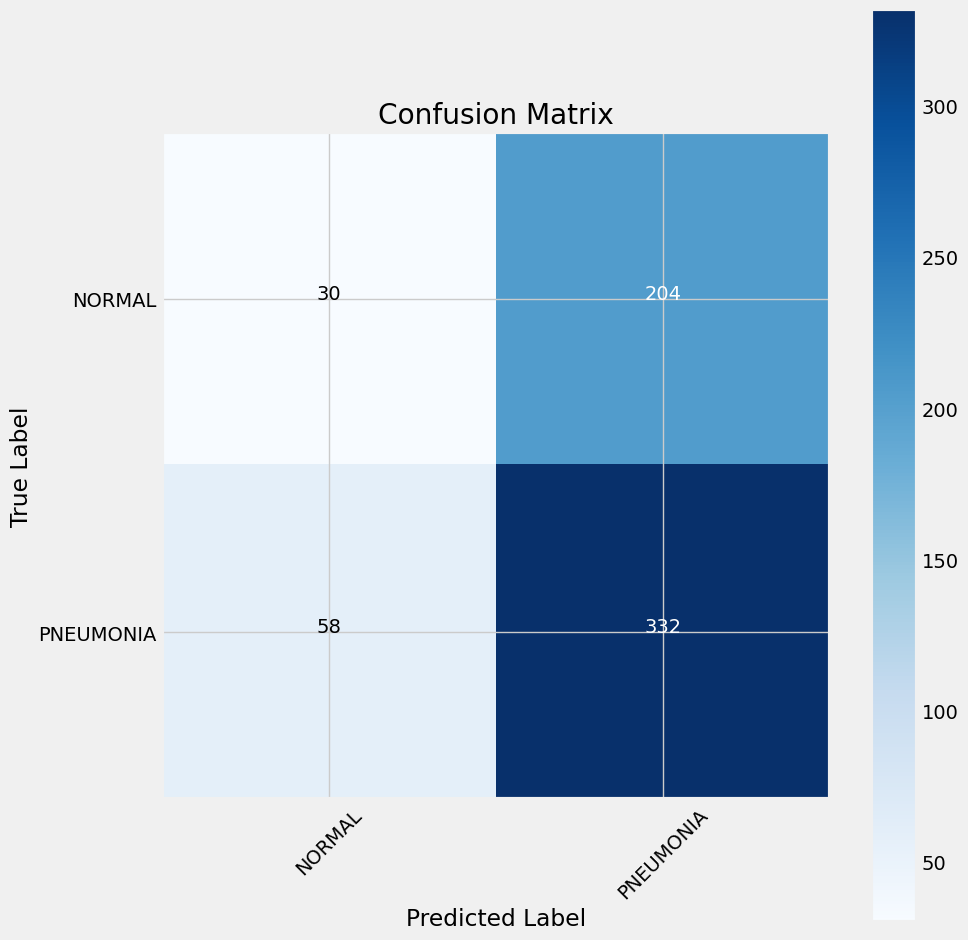

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      NORMAL       0.34      0.13      0.19       234
   PNEUMONIA       0.62      0.85      0.72       390

    accuracy                           0.58       624
   macro avg       0.48      0.49      0.45       624
weighted avg       0.51      0.58      0.52       624

